In [150]:
#Sheyenne Harris - Final Project
import pandas as pd
import csv

#Cleaning up data by removing Nan values
data = pd.read_csv("Meteorite_Landings.csv").dropna()

#Defined function to swap the 'id' and 'name' columns
def swap_columns(data, col1, col2):
    col_list = list(data.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    data = data[col_list]
    return data

#swap points and rebounds columns
data = swap_columns(data, 'id', 'name')
print(data)

          id        name nametype              recclass  mass (g)   fall  \
0          1      Aachen    Valid                    L5      21.0   Fell   
1          2      Aarhus    Valid                    H6     720.0   Fell   
2          6        Abee    Valid                   EH4  107000.0   Fell   
3         10    Acapulco    Valid           Acapulcoite    1914.0   Fell   
4        370     Achiras    Valid                    L6     780.0   Fell   
...      ...         ...      ...                   ...       ...    ...   
45711  31356  Zillah 002    Valid               Eucrite     172.0  Found   
45712  30409      Zinder    Valid  Pallasite, ungrouped      46.0  Found   
45713  30410        Zlin    Valid                    H4       3.3  Found   
45714  31357   Zubkovsky    Valid                    L6    2167.0  Found   
45715  30414  Zulu Queen    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500   

In [136]:
#Printing statistical information about dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38115 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   nametype     38115 non-null  object 
 3   recclass     38115 non-null  object 
 4   mass (g)     38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  float64
 7   reclat       38115 non-null  float64
 8   reclong      38115 non-null  float64
 9   GeoLocation  38115 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB
None
                 id      mass (g)          year        reclat       reclong
count  38115.000000  3.811500e+04  38115.000000  38115.000000  38115.000000
mean   25343.139000  1.560071e+04   1989.993913    -39.596529     61.309359
std    17395.360205  6.286817e+05     25.469892     46.175830     80.777583
min        1.000

In [141]:
#Printing number of columns to verifiy it is > 200 records
print(data.shape[0])

38115


In [142]:
#Coloumn names
print(data.head(0))
#Numbeer of columns
print(data.shape[1])

Empty DataFrame
Columns: [name, id, nametype, recclass, mass (g), fall, year, reclat, reclong, GeoLocation]
Index: []
10


<AxesSubplot:>

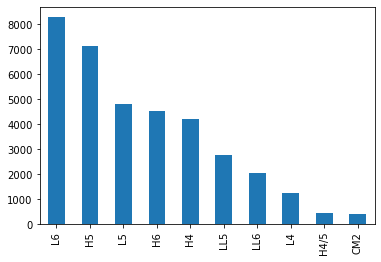

In [14]:
#Most frequent recclass
recclass= data['recclass'].value_counts(False, True)
#recclass.head(10)
recclass.head(10).plot.bar()

In [147]:
#Describing fall and nametype column to determine types of each
print(data["fall"].describe())
print(data["nametype"].describe())

count     38115
unique        2
top       Found
freq      37050
Name: fall, dtype: object
count     38115
unique        2
top       Valid
freq      38094
Name: nametype, dtype: object


In [151]:
#Describing mass statistics
data2 = data.rename(columns={'mass (g)':'mass'})
mass = data2['mass'].describe()
print(mass)

count    3.811500e+04
mean     1.560071e+04
std      6.286817e+05
min      0.000000e+00
25%      6.630000e+00
50%      2.909000e+01
75%      1.872900e+02
max      6.000000e+07
Name: mass, dtype: float64


In [152]:
#Average mass (in grams) by recclass. Sorting by largest to smallest values.
print(data2.groupby("recclass")["mass"].mean().sort_values(0, False))
#print(data2.groupby("recclass")["mass"].max())


recclass
Iron, IVB        4.322833e+06
Iron, IIIE       2.224277e+06
Iron, IAB-MG     1.359146e+06
Iron, IC         8.925563e+05
Iron, IAB-ung    7.335906e+05
                     ...     
H4(?)            4.000000e-01
L-metal          3.135000e-01
Fusion crust     1.300000e-02
Relict OC        0.000000e+00
Relict iron      0.000000e+00
Name: mass, Length: 422, dtype: float64


In [153]:
for recclass, mass in data2.groupby("recclass")["mass"].max().items():
    print(data2.loc[(data2['mass'] == mass) & (data2['recclass'] == recclass)])

        id        name nametype     recclass    mass   fall    year    reclat  \
7141  6910  Dhofar 125    Valid  Acapulcoite  2697.0  Found  2000.0  18.98667   

      reclong          GeoLocation  
7141  54.6005  (18.98667, 54.6005)  
        id                    name nametype               recclass  mass  \
9641  8041  Elephant Moraine 84302    Valid  Acapulcoite/Lodranite  59.6   

       fall    year    reclat    reclong             GeoLocation  
9641  Found  1984.0 -76.27639  157.17611  (-76.27639, 157.17611)  
          id                name nametype               recclass  mass   fall  \
24634  53196  Miller Range 07259    Valid  Acapulcoite/lodranite   3.5  Found   

         year  reclat  reclong GeoLocation  
24634  2007.0     0.0      0.0  (0.0, 0.0)  
          id                   name nametype         recclass    mass   fall  \
30122  53843  Northwest Africa 6901    Valid  Achondrite-prim  1197.0  Found   

         year  reclat  reclong GeoLocation  
30122  2011.0    

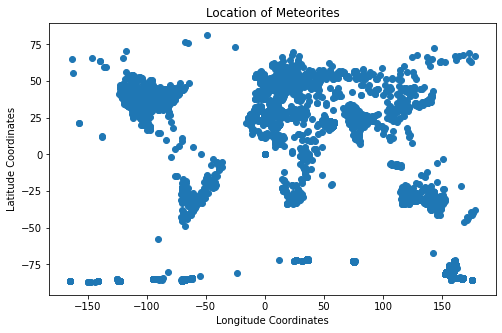

In [158]:
#Location of meteorites (lat, lon)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(x=data2['reclong'], y=data2['reclat'])
plt.title("Location of Meteorites") #title
plt.xlabel("Longitude Coordinates") #x label
plt.ylabel("Latitude Coordinates") #y label
plt.show()

<AxesSubplot:xlabel='reclong', ylabel='reclat'>

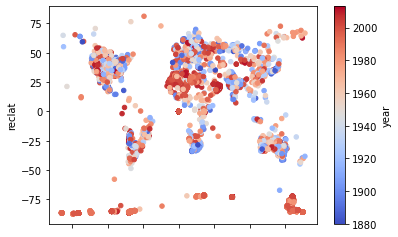

In [105]:
#Graphical image of lat and lon coordinates sorted by year (1880-2020)
data2[(data2['year']>1879) & (data2['year']<2020)].plot(x = 'reclong', y ='reclat', kind = "scatter", c = "year", colormap="coolwarm")

fall
Fell     23000000.0
Found    60000000.0
Name: mass, dtype: float64
60000000.0
29.09


<AxesSubplot:xlabel='reclong', ylabel='reclat'>

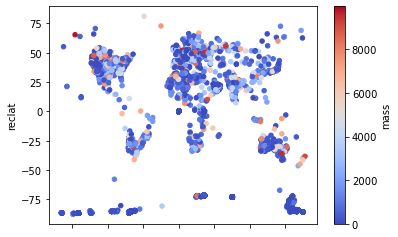

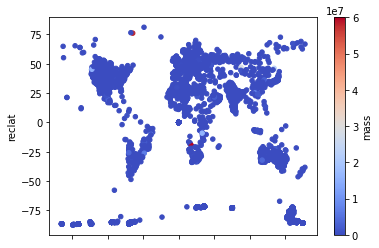

In [174]:
#Graphical image of lat and long coordinates sorted by only mass 
print(data2.groupby(['fall'])['mass'].max())
print(data2['mass'].max())
print(data2['mass'].median())
data2[data2['mass']<10000].plot(x = 'reclong', y ='reclat', kind = "scatter", c = "mass", colormap ="coolwarm")
data2.plot(x = 'reclong', y ='reclat', kind = "scatter", c = "mass", colormap ="coolwarm")

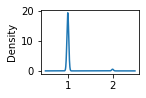

In [177]:
#Density plot of fell vs found
data2['fell_map']=data2['fall'].rank(method='dense', ascending=False).astype(int)

# Univariate Density Plots
import matplotlib.pyplot as plt
import pandas
data2['fell_map'].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()
#1 = found, 2 = fell

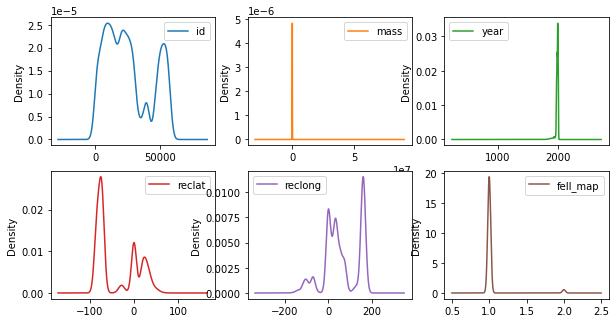

In [180]:
#Density plot of each column type
data2['fell_map']=data2['fall'].rank(method='dense', ascending=False).astype(int)

# Univariate Density Plots
import matplotlib.pyplot as plt
import pandas
data2.plot(kind='density', subplots=True, layout=(3,3), figsize=(10,8), sharex=False)
plt.show()

In [200]:
data2['fall'].replace(to_replace=r'^Fo.$', value='NaN', regex=True)
data2['fall'] = data2['fall'].fillna(0)
print(data2)
#data2['fall'] = data2['fall'].convert_objects(convert_numeric=True)
#df = pd.Series(['2$-32$-4','123$-12','00123','44'])
#data2.str.replace(r'\fell-','0').astype(float)
#data2.str.replace(r'\found-','1').astype(float)
#data2['fall'] = data2['fall'].astype(int)
#data2.plot(kind='pie', y='fall')

          id        name nametype              recclass      mass   fall  \
0          1      Aachen    Valid                    L5      21.0   Fell   
1          2      Aarhus    Valid                    H6     720.0   Fell   
2          6        Abee    Valid                   EH4  107000.0   Fell   
3         10    Acapulco    Valid           Acapulcoite    1914.0   Fell   
4        370     Achiras    Valid                    L6     780.0   Fell   
...      ...         ...      ...                   ...       ...    ...   
45711  31356  Zillah 002    Valid               Eucrite     172.0  Found   
45712  30409      Zinder    Valid  Pallasite, ungrouped      46.0  Found   
45713  30410        Zlin    Valid                    H4       3.3  Found   
45714  31357   Zubkovsky    Valid                    L6    2167.0  Found   
45715  30414  Zulu Queen    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  fell_map  
0      1880.0  5